# Dog Breed App: Predicting Group type based on feature Set
# Method : Decision Trees

In [2]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing AKC (American Kanine Corp) Dataset Encoded Data

In [3]:
# Loading data
file_path = Path("../sourcedata/akc_dog_breed_cln.csv")
dog_breed_val_df = pd.read_csv(file_path)
dog_breed_val_df.head()





,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category,akc_breed,kaggle_breed,Img_Link,group_values
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,10,12,7,12,12,15,...,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing,affenpinscher,affenpinscher,https://www.akc.org/wp-content/uploads/2017/11...,0
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,25,27,50,60,12,15,...,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary,afghan_hound,afghan_hound,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,1
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,21,23,44,50,11,14,...,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly,airedale_terrier,airedale,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,2
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,24,28,70,130,10,13,...,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive,akita,NaN,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,3
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,23,25,75,85,10,14,...,0.8,Energetic,0.4,Independent,0.8,Friendly,alaskan_malamute,malamute,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,3


In [4]:
dog_breed_val_df.columns

Index(['breed', 'description', 'temperament', 'popularity', 'min_height',
       'max_height', 'min_weight', 'max_weight', 'min_expectancy',
       'max_expectancy', 'group', 'grooming_frequency_value',
       'grooming_frequency_category', 'shedding_value', 'shedding_category',
       'energy_level_value', 'energy_level_category', 'trainability_value',
       'trainability_category', 'demeanor_value', 'demeanor_category',
       'akc_breed', 'kaggle_breed', 'Img_Link', 'group_values'],
      dtype='object')

In [5]:

# Define features set

col_to_drop = ['breed','group','description','grooming_frequency_category','shedding_category', 
                'energy_level_category', 'trainability_category', 'demeanor_category', 'temperament',
                'akc_breed', 'kaggle_breed', 'Img_Link', 'group_values']
X = dog_breed_val_df.copy()
X.drop(col_to_drop, axis=1, inplace=True)
X.head()




,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,148,10,12,7,12,12,15,0.6,0.6,0.6,0.8,1.0
1,113,25,27,50,60,12,15,0.8,0.2,0.8,0.2,0.2
2,60,21,23,44,50,11,14,0.6,0.4,0.6,1.0,0.8
3,47,24,28,70,130,10,13,0.8,0.6,0.8,1.0,0.6
4,58,23,25,75,85,10,14,0.6,0.6,0.8,0.4,0.8


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   popularity                277 non-null    int64  
 1   min_height                277 non-null    int64  
 2   max_height                277 non-null    int64  
 3   min_weight                277 non-null    int64  
 4   max_weight                277 non-null    int64  
 5   min_expectancy            277 non-null    int64  
 6   max_expectancy            277 non-null    int64  
 7   grooming_frequency_value  277 non-null    float64
 8   shedding_value            277 non-null    float64
 9   energy_level_value        277 non-null    float64
 10  trainability_value        277 non-null    float64
 11  demeanor_value            277 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 26.1 KB


In [7]:
# Define target vector
y = dog_breed_val_df["group_values"].values.reshape(-1, 1)
y[:5]



array([[0],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [10]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [12]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()



In [13]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [14]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)



## Model Evaluation

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm)
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [16]:
cm


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  1,  0,  0,  1,  1,  0],
       [ 0,  1,  6,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  3],
       [ 0,  2,  1,  0,  0,  0,  2,  2,  0],
       [ 0,  1,  0,  0,  1,  0,  2,  1,  0],
       [ 0,  4,  0,  2,  0,  1,  2,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,0,1,2,3,4,5,6,7,8
0,4,0,0,0,0,0,0,0,0
1,1,1,2,1,0,0,1,1,0
2,0,1,6,0,0,0,2,1,0
3,0,0,0,2,0,0,1,2,0
4,0,0,0,0,18,0,0,0,3
5,0,2,1,0,0,0,2,2,0
6,0,1,0,0,1,0,2,1,0
7,0,4,0,2,0,1,2,1,0
8,0,0,0,0,1,0,0,0,0


Accuracy Score : 0.4857142857142857
Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.11      0.14      0.12         7
           2       0.67      0.60      0.63        10
           3       0.40      0.40      0.40         5
           4       0.90      0.86      0.88        21
           5       0.00      0.00      0.00         7
           6       0.20      0.40      0.27         5
           7       0.12      0.10      0.11        10
           8       0.00      0.00      0.00         1

    accuracy                           0.49        70
   macro avg       0.36      0.39      0.37        70
weighted avg       0.48      0.49      0.48        70



In [18]:
# Decision Tree  in sklearn will automatically calculate feature importance
importances = dt_model.feature_importances_
# We can sort the features by their importance
sorted(zip(dt_model.feature_importances_, X.columns), reverse=True)

[(0.2678933587167765, 'popularity'),
 (0.22163959648261236, 'max_weight'),
 (0.1015290255777151, 'max_height'),
 (0.09331955494533095, 'min_weight'),
 (0.05773389705351907, 'trainability_value'),
 (0.05675264118411709, 'min_height'),
 (0.04924466534971053, 'grooming_frequency_value'),
 (0.0448042733659729, 'demeanor_value'),
 (0.03691327205314251, 'energy_level_value'),
 (0.03554147014775242, 'shedding_value'),
 (0.017463604417670697, 'min_expectancy'),
 (0.01716464070567986, 'max_expectancy')]

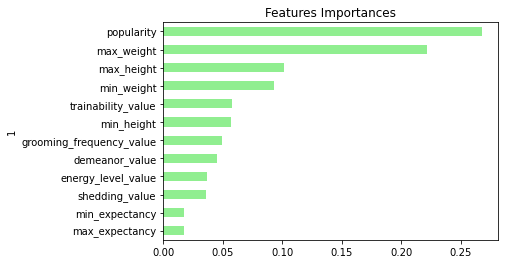

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(dt_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [20]:
# Extract the data from the Series and convert it to a numpy array
user_val = 100
user_input = []
user_input = X.iloc[user_val].values
print(dog_breed_val_df[['group','group_values']].iloc[user_val])

# # Reshape the user_input to a 2-dimensional array
user_input_reshaped = user_input.reshape(1, -1)

# # Now user_input_reshaped is a 2D array
print((user_input_reshaped))

group           Sporting Group
group_values                 6
Name: 100, dtype: object
[[94.  24.  25.  50.  70.  12.  12.   0.6  0.8  0.8  0.8  0.8]]


In [22]:
new_predictions = dt_model.predict(user_input_reshaped)
print(new_predictions)
print(y[new_predictions])

[3]
[[3]]


In [23]:
# Save Model Using Pickle

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

# save the model to disk
filename = 'dog_app_dt_group_pred.sav'
pickle.dump(dt_model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.4857142857142857
